In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
df = pd.read_csv('used_car4.csv',encoding='utf-8')
df

,Unnamed: 0,name,type,km,price,insurance,performance,registration,modelname,year
0,0,현대 포터2 초장축 더블캡 CRDi 최고급형,디젤,100000,6900000,1,1,0,포터,2010
1,1,현대 포터2 더블캡 4WD 장축 프리미엄,디젤,100000,10900000,1,1,0,포터,2013
2,2,현대 포터2 CRDi 슈퍼캡 초장축 골드 기본형,디젤,100000,4900000,1,1,0,포터,2009
3,3,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,디젤,100000,7800000,1,1,0,투싼,2012
4,4,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,디젤,100000,7800000,1,1,0,투싼,2012
...,...,...,...,...,...,...,...,...,...,...
2900,2901,기아 쏘렌토 4세대 2.2 디젤 2WD 프레스티지,디젤,9000,35990000,1,1,0,쏘렌토,2020
2901,2902,기아 스팅어 3.3 T-GDi AWD GT,가솔린,9000,47000000,1,0,0,스팅어,2020
2902,2903,기아 디 올 뉴 스포티지 1.6 터보 2WD 노블레스,가솔린,9000,33500000,1,1,0,스포티지,2021
2903,2904,기아 더 뉴 레이 1.0 시그니처,가솔린,9000,15990000,1,1,0,레이,2021


In [ ]:
df.loc[df['insurance'] == 0,'insurance'] = 2
df.loc[df['performance'] == 0,'performance'] = 2
df.loc[df['registration'] == 0,'registration'] = 2

In [ ]:
df.describe()

,Unnamed: 0,km,price,insurance,performance,registration,year
count,2905.000000,2.905000e+03,2.905000e+03,2905.000000,2905.000000,2905.000000,2905.000000
mean,1452.667126,1.003703e+05,1.556611e+07,1.183133,1.261274,1.939415,2014.145955
std,839.130336,7.863202e+04,1.508493e+07,0.386842,0.439404,0.238609,4.327825
min,0.000000,7.000000e+00,9.000000e+05,1.000000,1.000000,1.000000,1987.000000
25%,726.000000,5.000000e+04,5.770000e+06,1.000000,1.000000,2.000000,2011.000000
50%,1453.000000,9.000000e+04,1.050000e+07,1.000000,1.000000,2.000000,2014.000000
75%,2179.000000,1.400000e+05,1.950000e+07,1.000000,2.000000,2.000000,2018.000000
max,2905.000000,1.690000e+06,9.999000e+07,2.000000,2.000000,2.000000,2023.000000


In [ ]:
# 필요없는 열 제거
df=df.drop(['Unnamed: 0', 'name'], axis=1)
df

,type,km,price,insurance,performance,registration,modelname,year
0,디젤,100000,6900000,1,1,2,포터,2010
1,디젤,100000,10900000,1,1,2,포터,2013
2,디젤,100000,4900000,1,1,2,포터,2009
3,디젤,100000,7800000,1,1,2,투싼,2012
4,디젤,100000,7800000,1,1,2,투싼,2012
...,...,...,...,...,...,...,...,...
2900,디젤,9000,35990000,1,1,2,쏘렌토,2020
2901,가솔린,9000,47000000,1,2,2,스팅어,2020
2902,가솔린,9000,33500000,1,1,2,스포티지,2021
2903,가솔린,9000,15990000,1,1,2,레이,2021


Text(0.5, 1.0, 'price')

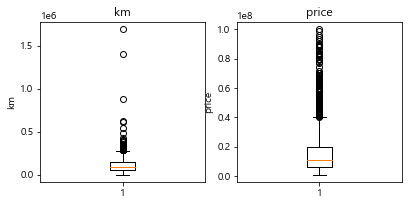

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(332)
plt.boxplot(df['km'])
plt.ylabel('km')
plt.title('km')
plt.subplot(333)
plt.boxplot(df['price'])
plt.ylabel('price')
plt.title('price')

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

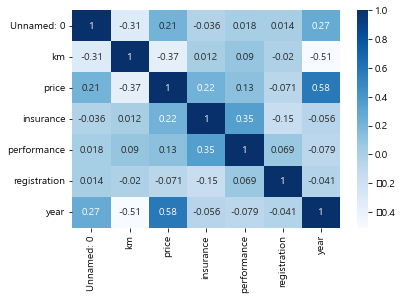

In [ ]:
sns.heatmap(df.corr(),annot=True, cmap='Blues')

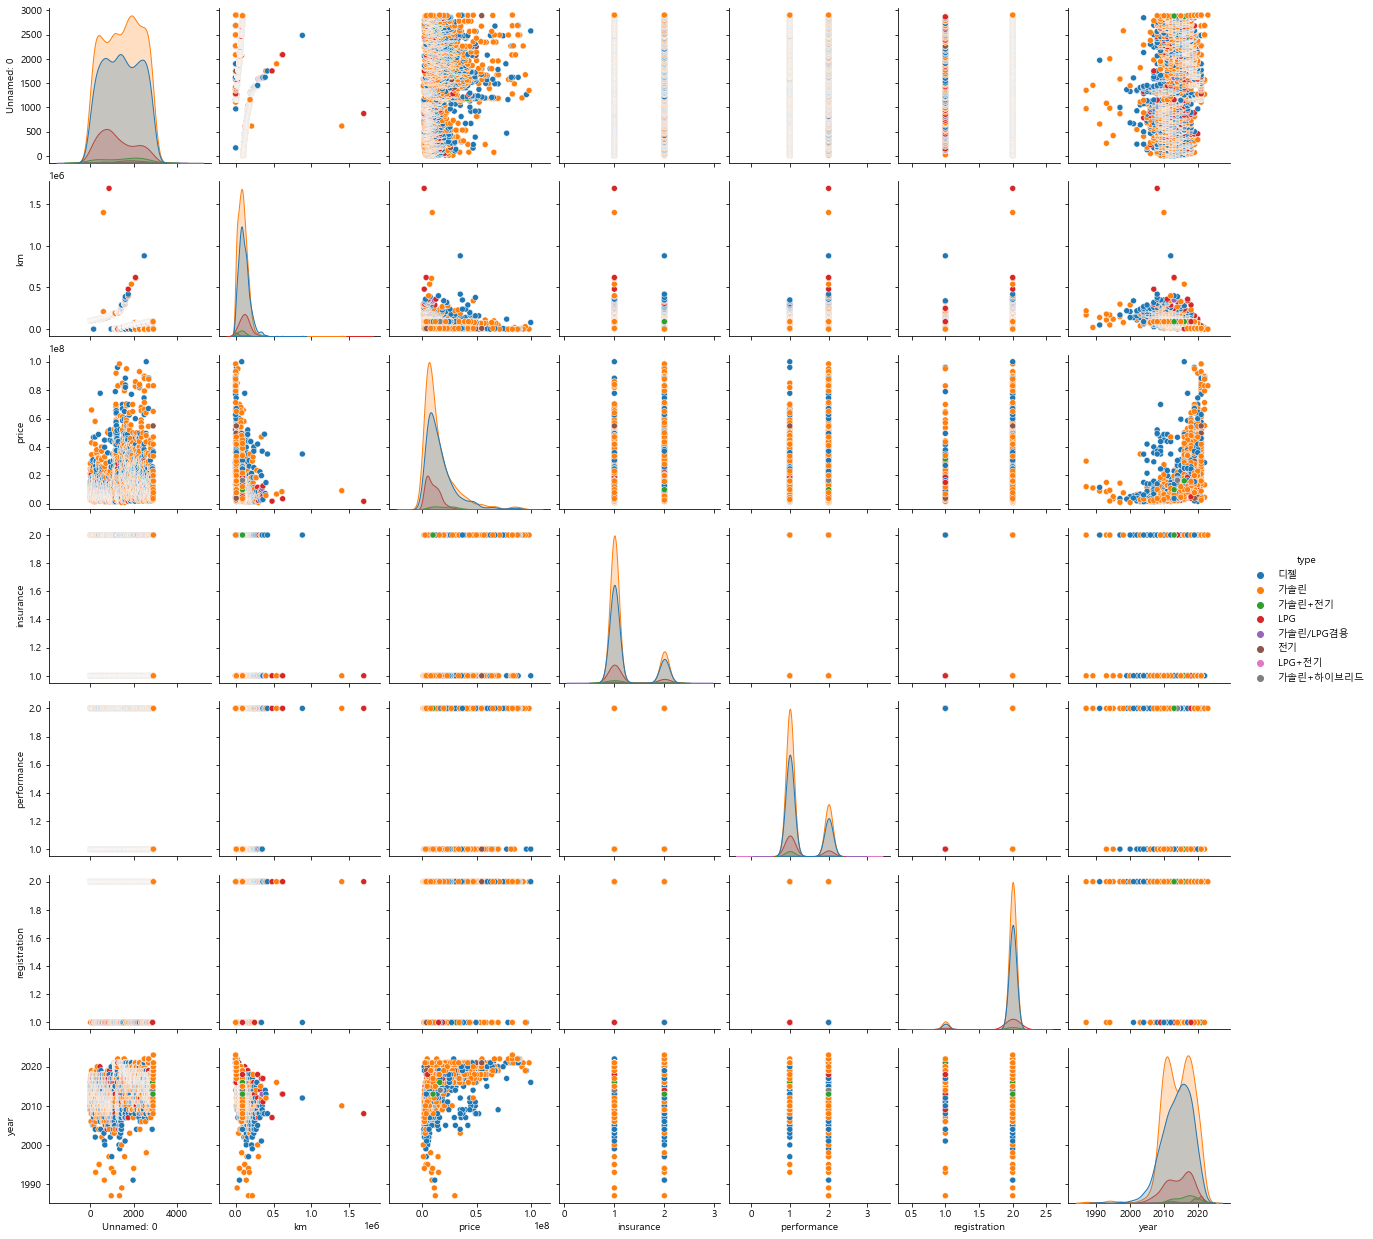

In [ ]:
sns.pairplot(df, diag_kind='kde',hue='type')

<AxesSubplot:xlabel='price', ylabel='Count'>

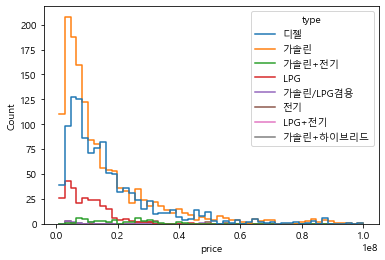

In [ ]:
sns.histplot(data=df,
             x='price', hue='type',
             fill=False, element='step')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          2905 non-null   object
 1   km            2905 non-null   int64 
 2   price         2905 non-null   int64 
 3   insurance     2905 non-null   int64 
 4   performance   2905 non-null   int64 
 5   registration  2905 non-null   int64 
 6   modelname     2905 non-null   object
 7   year          2905 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 181.7+ KB


In [ ]:
# one-hot-encoding & x, y data 분리
x=df.drop(['price'], axis=1)
x_dummies=pd.get_dummies(x)
x_dummies

,km,insurance,performance,registration,year,type_LPG,type_LPG+전기,type_가솔린,type_가솔린+전기,type_가솔린+하이브리드,...,modelname_트위지,modelname_티볼리,modelname_티코,modelname_팰리세이드,modelname_포니,modelname_포르테,modelname_포터,modelname_포텐샤,modelname_프라이드,modelname_프레지오
0,100000,1,1,2,2010,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,100000,1,1,2,2013,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,100000,1,1,2,2009,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,100000,1,1,2,2012,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100000,1,1,2,2012,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,9000,1,1,2,2020,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2901,9000,1,2,2,2020,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2902,9000,1,1,2,2021,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2903,9000,1,1,2,2021,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# x, y data 분리
y=df['price']
y

0        6900000
1       10900000
2        4900000
3        7800000
4        7800000
          ...   
2900    35990000
2901    47000000
2902    33500000
2903    15990000
2904    83060000
Name: price, Length: 2905, dtype: int64

In [ ]:
# train, test data split
x_train, x_test, y_train, y_test=train_test_split(x_dummies, y, test_size=0.2, shuffle=True, random_state=12)
print('train', x_train)
print('test', x_test)

train           km  insurance  performance  registration  year  type_LPG  \
1089  180000          1            1             2  2015         0   
2698   90000          1            1             2  2018         0   
1324  210000          2            1             2  2007         0   
902   160000          2            1             1  2013         0   
2770   90000          1            2             2  2018         0   
...      ...        ...          ...           ...   ...       ...   
1987   50000          1            2             2  2017         0   
1283  200000          1            1             1  2004         0   
1414     390          1            2             2  2021         0   
1691   30000          1            1             2  2020         0   
1867   40000          1            1             2  2017         0   

      type_LPG+전기  type_가솔린  type_가솔린+전기  type_가솔린+하이브리드  ...  modelname_트위지  \
1089            0         0            0               0  ...            

In [ ]:
# train,test data size
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
# Model Comparison
comp_dict = {}
comp_dict2 = []

x_train shape: (2324, 109)
x_test shape: (581, 109)


In [ ]:
# data scale 조정
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# DecisionTree
model = tree.DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_pred, y_test)
RMSE=round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2)

comp_dict['DecisionTree'] = r2
comp_dict2.append(RMSE)
print(f'DecisionTree r2-score: {r2:0.5f}')
print(f'DecisionTree RMSE: {RMSE:0.2f}')
print('MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))
#print('RMSE:', round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2))

DecisionTree r2-score: 0.75651
DecisionTree RMSE: 2670.49
MSE: 7131497.05


In [ ]:
# DecisionTree
model = tree.DecisionTreeRegressor( random_state=42, max_leaf_nodes = 1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_pred, y_test)
RMSE=round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2)

comp_dict['DecisionTree'] = r2
comp_dict2.append(RMSE)
print(f'DecisionTree r2-score: {r2:0.5f}')
print(f'DecisionTree RMSE: {RMSE:0.2f}')
print('MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))
#print('RMSE:', round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2))

DecisionTree r2-score: 0.76203
DecisionTree RMSE: 2665.96
MSE: 7107364.26


In [ ]:
# RandomForest
model = ensemble.RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_pred, y_test)
RMSE=round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2)

comp_dict['RandomForest'] = r2
comp_dict2['RandomForest RMSE'] = RMSE
print(f'RandomForest r2-score: {r2:0.5f}')
print(f'RandomForest RMSE: {RMSE:0.2f}')
print('MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))
#print('RMSE:', round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2))

RandomForest r2-score: 0.81870
RandomForest RMSE: 2433.45
MSE: 5921700.8


In [ ]:
# RandomForest
model = ensemble.RandomForestRegressor(random_state=42, max_depth=53)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_pred, y_test)
RMSE=round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2)

comp_dict['RandomForest'] = r2
comp_dict2.append(RMSE)
print(f'RandomForest r2-score: {r2:0.5f}')
print(f'RandomForest RMSE: {RMSE:0.2f}')
print('MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))
#print('RMSE:', round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2))

RandomForest r2-score: 0.81870
RandomForest RMSE: 2433.45
MSE: 5921700.8


In [ ]:
# GradienBoosting
model = ensemble.GradientBoostingRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_pred, y_test)

comp_dict['GradientBoost'] = r2
comp_dict2['GradientBoost RMSE'] = RMSE
print(f'GradientBoost r2-score: {r2:0.5f}')
print(f'GradientBoost RMSE: {RMSE:0.2f}')
print('MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))
#print('RMSE:', round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2))

GradientBoost r2-score: 0.73780
GradientBoost RMSE: 2433.45
MSE: 6551993.66


In [ ]:
# GradienBoosting
model = ensemble.GradientBoostingRegressor(random_state=42, max_depth=9)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_pred, y_test)
RMSE=round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2)

comp_dict['GradientBoost'] = r2
comp_dict2.append(RMSE)
print(f'GradientBoost r2-score: {r2:0.3f}')
print(f'GradientBoost RMSE: {RMSE:0.2f}')
print('MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))
#print('RMSE:', round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2))

GradientBoost r2-score: 0.813
GradientBoost RMSE: 2431.05
MSE: 5910021.03


In [ ]:
#LGBMRegressor
model = LGBMRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_pred, y_test)

comp_dict['LGBM'] = r2
comp_dict2['LGBM RMSE'] = RMSE
print(f'LGBM r2-score: {r2:0.3f}')
print(f'LGBM RMSE: {RMSE:0.2f}')
print('MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))
#print('RMSE:', round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2))

LGBM r2-score: 0.778
LGBM RMSE: 2431.05
MSE: 6626733.29


In [ ]:
#LGBMRegressor
model = LGBMRegressor(random_state=42, num_iterations=345)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_pred, y_test)

comp_dict['LGBM'] = r2
comp_dict2['LGBM RMSE'] = RMSE
print(f'LGBM r2-score: {r2:0.3f}')
print(f'LGBM RMSE: {RMSE:0.2f}')
print('MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))
#print('RMSE:', round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2))

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LGBM r2-score: 0.792
LGBM RMSE: 2431.05
MSE: 6493378.63


In [ ]:
#LGBMRegressor
model = LGBMRegressor(random_state=42, num_iterations=345, max_depth=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_pred, y_test)
RMSE=round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2)

comp_dict['LGBM'] = r2
comp_dict2.append(RMSE)
print(f'LGBM r2-score: {r2:0.3f}')
print(f'LGBM RMSE: {RMSE:0.2f}')
print('MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))
#print('RMSE:', round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2))

LGBM r2-score: 0.792
LGBM RMSE: 2540.40
MSE: 6453617.94


C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [ ]:
#CatBoostRegressor
model = CatBoostRegressor(verbose=0, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_pred, y_test)
RMSE=round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2)

comp_dict['CatBoost'] = r2
comp_dict2['CatBoost RMSE'] = RMSE
print(f'CatBoost r2-score: {r2:0.3f}')
print(f'CatBoost RMSE: {RMSE:0.2f}')
print('test MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))
#print('test RMSE:', round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2))

CatBoost r2-score: 0.823
CatBoost RMSE: 2395.31
test MSE: 5737492.24


In [ ]:
#CatBoostRegressor
model = CatBoostRegressor(verbose=0, random_state=42, learning_rate=0.05)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_pred, y_test)
RMSE=round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2)

comp_dict['CatBoost'] = r2
comp_dict2.append(RMSE)
print(f'CatBoost r2-score: {r2:0.5f}')
print(f'CatBoost RMSE: {RMSE:0.2f}')
print('test MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))
#print('test RMSE:', round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2))

CatBoost r2-score: 0.82981
CatBoost RMSE: 2376.85
test MSE: 5649413.65


In [ ]:
#XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_pred, y_test)
RMSE=round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2)

comp_dict['XGBoost'] = r2
comp_dict2.append(RMSE)
print(f'XGBoost r2-score: {r2:0.5f}')
print(f'XGBoost RMSE: {RMSE:0.2f}')
print('MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))

XGBoost r2-score: 0.82150
XGBoost RMSE: 2415.02
MSE: 5832331.52


In [ ]:
# 단순선형회귀
mlr=LinearRegression()
mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)
y_predict
r2 = metrics.r2_score(y_predict, y_test)
RMSE=round(np.sqrt(mean_squared_error(y_predict, y_test, squared=False)), 2)

comp_dict['Linear Regression'] = r2
comp_dict2.append(RMSE)
print(f'Linear Regression r2-score: {r2:0.5f}')
print(f'Linear Regressiont RMSE: {RMSE:0.2f}')
print('MSE:', round(mean_squared_error(y_predict, y_test, squared=False), 2))

print('x 변수의 기울기:', mlr.coef_)
print('절편:', mlr.intercept_)

Linear Regression r2-score: 0.69982
Linear Regressiont RMSE: 2668.13
MSE: 7118903.92
x 변수의 기울기: [-2.46943814e+06  9.85343279e+05  5.07044824e+05 -3.16883410e+05
  6.77383891e+06  7.49152035e+17  7.58155953e+16  1.29271411e+18
  3.40374744e+17  9.28347648e+16  1.51435158e+17  1.25098997e+18
  2.00070221e+17 -2.22508646e+18 -1.43090456e+18 -3.22461517e+18
 -5.22209307e+18 -5.17029674e+18 -2.74637804e+18 -1.87147129e+18
 -7.65675477e+17 -2.09101057e+18 -2.28909879e+18 -3.75134816e+18
 -1.94746778e+18 -2.02054553e+18 -1.08236221e+18 -9.37555163e+17
 -6.06520720e+18 -1.08236221e+18 -1.94746778e+18 -1.08236221e+18
 -1.87147129e+18 -4.24052071e+18 -5.41530893e+17 -2.94751461e+18
 -9.37555163e+17 -1.08236221e+18 -9.37555163e+17 -1.70915051e+18
 -2.99558403e+18 -1.20985691e+18 -4.33743090e+18 -3.67560706e+18
 -5.41530893e+17 -9.37555163e+17 -1.79218481e+18 -5.41530893e+17
 -2.09101057e+18 -1.08236221e+18 -5.41530893e+17 -3.35408480e+18
 -1.79218481e+18 -4.98397515e+18 -7.65675477e+17 -1.0823622

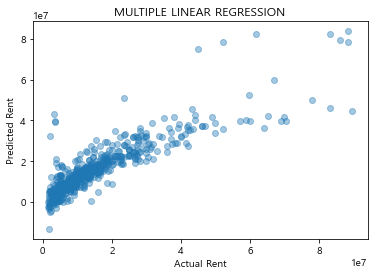

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [ ]:
# K-Fold 교차검증
lr=LinearRegression()
mse_score=-1*cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

print('개별 Fold의 MSE:', np.round(mse_score, 4))
print('평균 MSE: %.4f' %np.mean(mse_score))
print('평균 RMSE: %.4f' %np.sqrt(np.mean(mse_score)))

개별 Fold의 MSE: [2.64406782e+39 1.77675335e+39 1.17407483e+41 1.49418346e+40
 3.09187378e+38]
평균 MSE: 27415865284616515851148548132582694322176.0000
평균 RMSE: 165577369482114072576.0000


In [ ]:
#2차 다항식 변환
pf=PolynomialFeatures(degree=2)
x_train_poly=pf.fit_transform(x_train)
print('원본 학습 데이터셋:', x_train.shape)
print('2차 다항식 학습 데이터셋:', x_train_poly.shape)

#2차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
lr=LinearRegression()
lr.fit(x_train_poly, y_train)

#2차 다항식 테스트 데이터에 대한 예측 및 평가
y_train_pred=lr.predict(x_train_poly)
train_mse=mean_squared_error(y_train, y_train_pred)
print('Train MSE: %.4f' %train_mse)

x_test_poly=pf.fit_transform(x_test)
y_test_pred=lr.predict(x_test_poly)
test_mse=mean_squared_error(y_test, y_test_pred)

print('Test MSE: %.4f' % test_mse)
print('평균 RMSE: %.4f' %np.sqrt(np.mean(mse_score)))
r2 = metrics.r2_score(y_test_pred, y_test)

RMSE=round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2)
comp_dict['2차 다항식 선형 회귀모형'] = r2
print(f'2차 다항식 선형 회귀모형: {r2:0.5f}')
print(f'2차 다항식 선형 회귀모형: {RMSE:0.2f}')
print('MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))

원본 학습 데이터셋: (2324, 109)
2차 다항식 학습 데이터셋: (2324, 6105)
Train MSE: 26739539998195.3320
Test MSE: 3605249122578511607415091857685741568.0000
평균 RMSE: 165577369482114072576.0000
2차 다항식 선형 회귀모형: -0.00000
2차 다항식 선형 회귀모형: 2415.02
MSE: 5832331.52


In [ ]:
# #15차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
# pf=PolynomialFeatures(degree=3)
# x_train_poly=pf.fit_transform(x_train)
# print('원본 학습 데이터셋:', x_train.shape)
# print('2차 다항식 학습 데이터셋:', x_train_poly.shape)

# lr=LinearRegression()
# lr.fit(x_train_poly, y_train)

# y_train_pred=lr.predict(x_train_poly)
# train_mse=mean_squared_error(y_train, y_train_pred)
# print('Train MSE: %.4f' %train_mse)

# x_test_poly=pf.fit_transform(x_test)
# y_test_pred=lr.predict(x_test_poly)
# test_mse=mean_squared_error(y_test, y_test_pred)
# print('Test MSE: %.4f' % test_mse)
#print('평균 RMSE: %.4f' %np.sqrt(np.mean(mse_score)))
#시간너무 오래걸림 - 포기

In [ ]:
# Ridge (L2 규제) p.120
from sklearn.linear_model import Ridge
rdg=Ridge(alpha=2.5)
rdg.fit(x_train_poly, y_train)

y_train_pred=rdg.predict(x_train_poly)
train_mse=mean_squared_error(y_train, y_train_pred)
train_rmse=np.sqrt(train_mse)
print('Train MSE: %.4f' % train_mse)
print('Train RMSE: %.4f' % train_rmse)
y_test_pred=rdg.predict(x_test_poly)
test_mse=mean_squared_error(y_test, y_test_pred)
test_rmse=np.sqrt(test_mse)
print('Test MSE: %.4f' %test_mse)
print('Test RMSE: %.4f' % test_rmse)
r2 = metrics.r2_score(y_test_pred, y_test)
RMSE=round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2)

comp_dict['Ridge Regression'] = r2
print(f'Ridge Regression r2-score: {r2:0.5f}')
print(f'Ridge Regression RMSE: {RMSE:0.2f}')
print('MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))

Train MSE: 10757180791554.8184
Train RMSE: 3279814.1398
Test MSE: 13844776525403.8418
Test RMSE: 3720856.9612
Ridge Regression r2-score: 0.78209
Ridge Regression RMSE: 1829.37
MSE: 3346612.66


In [ ]:
# Lasso(L1 규제) p.121
from sklearn.linear_model import Lasso
las=Lasso(alpha=0.05)
las.fit(x_train_poly, y_train)

y_train_pred=rdg.predict(x_train_poly)
train_mse=mean_squared_error(y_train, y_train_pred)
train_rmse=np.sqrt(train_mse)
print('Train MSE: %.4f' % train_mse)
print('Train RMSE: %.4f' % train_rmse)
y_test_pred=rdg.predict(x_test_poly)
test_mse=mean_squared_error(y_test, y_test_pred)
test_rmse=np.sqrt(test_mse)
print('Test MSE: %.4f' %test_mse)
print('Test RMSE: %.4f' % test_rmse)
r2 = metrics.r2_score(y_test_pred, y_test)
RMSE=round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2)

comp_dict['Lasso Regression'] = r2
print(f'Lasso Regression r2-score: {r2:0.5f}')
print(f'Lasso Regression RMSE: {RMSE:0.2f}')
print('MSE:', round(mean_squared_error(y_pred, y_test, squared=False), 2))

Train MSE: 10757180791554.8184
Train RMSE: 3279814.1398
Test MSE: 13844776525403.8418
Test RMSE: 3720856.9612
Lasso Regression r2-score: 0.78209
Lasso Regression RMSE: 1829.37
MSE: 3346612.66


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1404013191303348e+16, tolerance: 17195673434351.719
  positive)


In [ ]:
# ElasticNet(L2/L1 규제) p.121
from sklearn.linear_model import ElasticNet
ela=ElasticNet(alpha=0.01, l1_ratio=0.7)
ela.fit(x_train_poly, y_train)

y_train_pred=rdg.predict(x_train_poly)
train_mse=mean_squared_error(y_train, y_train_pred)
train_rmse=np.sqrt(train_mse)
print('Train MSE: %.4f' % train_mse)
print('Train RMSE: %.4f' % train_rmse)
y_test_pred=rdg.predict(x_test_poly)
test_mse=mean_squared_error(y_test, y_test_pred)
test_rmse=np.sqrt(test_mse)
print('Test MSE: %.4f' %test_mse)
print('Test RMSE: %.4f' % test_rmse)

r2 = metrics.r2_score(y_test_pred, y_test)
RMSE=round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2)

comp_dict['ElasticNet Regression'] = r2
print(f'ElasticNet Regression r2-score: {r2:0.5f}')
print(f'ElasticNet Regression RMSE: {RMSE:0.2f}')

Train MSE: 10757180791554.8184
Train RMSE: 3279814.1398
Test MSE: 13844776525403.8418
Test RMSE: 3720856.9612
ElasticNet Regression r2-score: 0.78209
ElasticNet Regression RMSE: 1829.37


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1564298273886282e+16, tolerance: 17195673434351.719
  positive)


In [ ]:
last_df = pd.DataFrame(comp_dict.items(), columns=['Estimator', 'r2-score'])

In [ ]:
last_df

,Estimator,r2-score
0,DecisionTree,0.762029
1,RandomForest,0.818705
2,GradientBoost,0.813302
3,LGBM,0.791746
4,CatBoost,0.829811
5,XGBoost,0.821497
6,Linear Regression,0.699821


In [ ]:
last_df['RMSE'] = comp_dict2

In [ ]:
last_df

,Estimator,r2-score,RMSE
0,DecisionTree,0.762029,2665.96
1,RandomForest,0.818705,2433.45
2,GradientBoost,0.813302,2431.05
3,LGBM,0.791746,2540.40
4,CatBoost,0.829811,2376.85
5,XGBoost,0.821497,2415.02
6,Linear Regression,0.699821,2668.13


In [ ]:
last_df.sort_values(by='r2-score', ascending=False).style.background_gradient()

,Estimator,r2-score,RMSE
4,CatBoost,0.829811,2376.850000
5,XGBoost,0.821497,2415.020000
1,RandomForest,0.818705,2433.450000
2,GradientBoost,0.813302,2431.050000
3,LGBM,0.791746,2540.400000
0,DecisionTree,0.762029,2665.960000
6,Linear Regression,0.699821,2668.130000


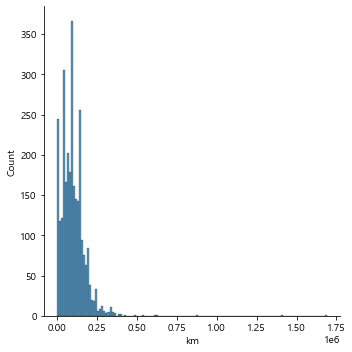

In [ ]:
sns.displot(x='km', kind='hist', data=df)
plt.show()

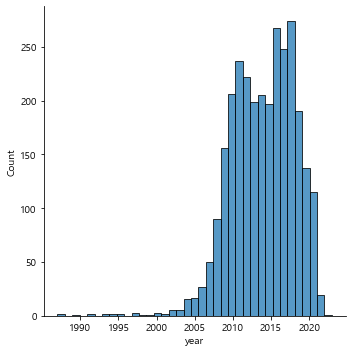

In [ ]:
sns.displot(x='year', kind='hist', data=df)
plt.show()

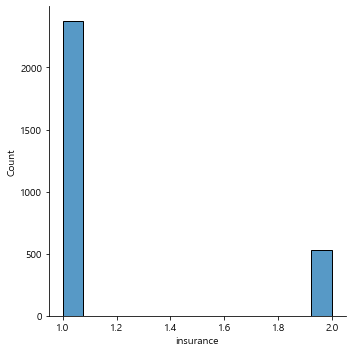

In [ ]:
sns.displot(x='insurance', kind='hist', data=df)
plt.show()

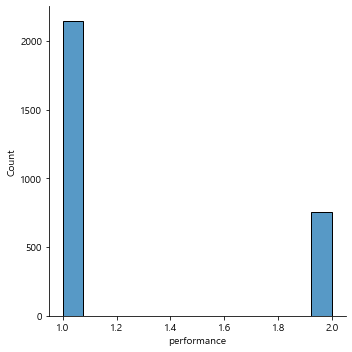

In [ ]:
sns.displot(x='performance', kind='hist', data=df)
plt.show()

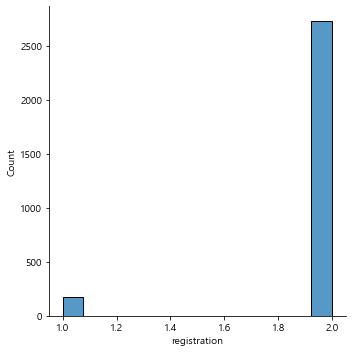

In [ ]:
sns.displot(x='registration', kind='hist', data=df)
plt.show()